In [30]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Prodigy Intern\\API_SP.POP.TOTL_DS2_en_csv_v2_56\\API_SP.POP.TOTL_DS2_en_csv_v2_56.csv', skiprows=4)


In [31]:

dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [32]:

# Select relevant columns for analysis (e.g., recent years)
selected_columns = ['Country Name', 'Country Code', '2020', '2021', '2022']
population_data = dataset[selected_columns].dropna()  # Drop rows with missing data

## Creating Visualizations


Total Population Coparision of Selected Countries

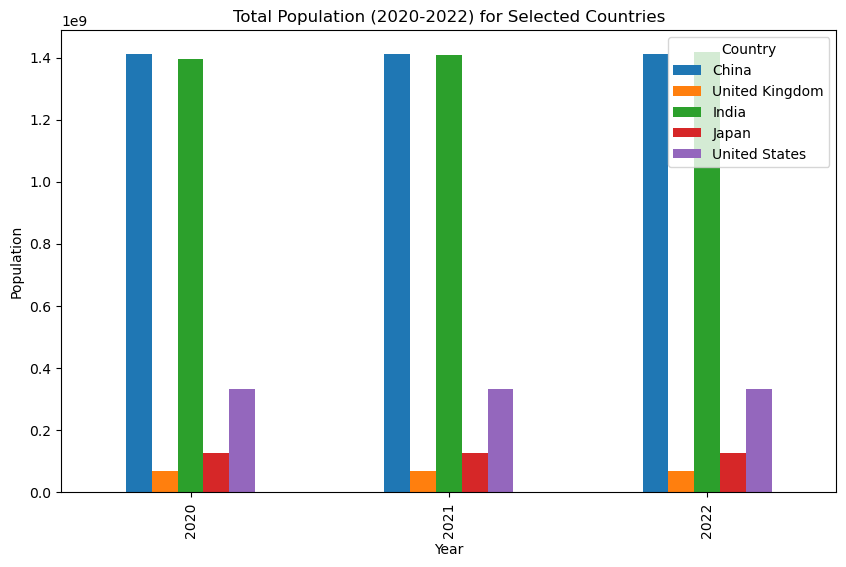

In [33]:
# Filter for selected countries
countries = ['India', 'China', 'United States', 'United Kingdom', 'Japan']
filtered_data = population_data[population_data['Country Name'].isin(countries)]

# Plot population over recent years for these countries
filtered_data.set_index('Country Name')[['2020', '2021', '2022']].T.plot(kind='bar', figsize=(10, 6))
plt.title("Total Population (2020-2022) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.show()

Population Growth Trend for a Specific Country

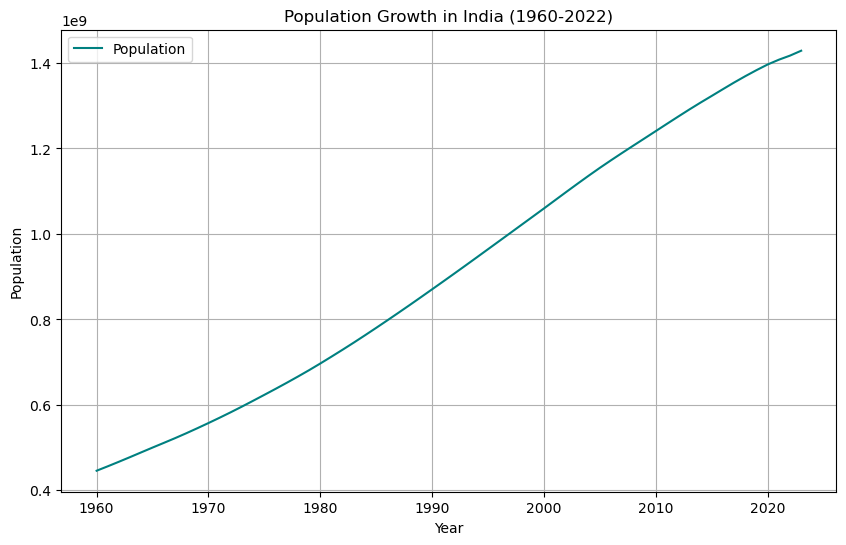

In [34]:

# Extract India's data and select only year columns by dropping non-year columns
india_data = dataset[dataset['Country Name'] == 'India'].iloc[:, 4:].T  # Select only year columns

# Remove any columns that are not numeric (if they exist)
india_data = india_data[india_data.index.str.isnumeric()]  # Keep only rows with numeric indexes

# Convert index to integers to represent years
india_data.index = india_data.index.astype(int)
india_data.columns = ['Population']  # Rename column for easier plotting

# Plot
india_data.plot(figsize=(10, 6), color='teal')
plt.title("Population Growth in India (1960-2022)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

Poupulation Distribution by Continent in 2022

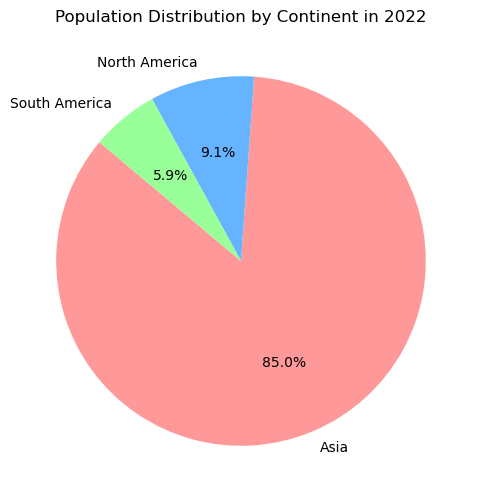

In [35]:
continent_map = {
    'India': 'Asia',
    'China': 'Asia',
    'United States': 'North America',
    'Indonesia': 'Asia',
    'Brazil': 'South America'
}

# Apply continent mapping
population_data['Continent'] = population_data['Country Name'].map(continent_map)
continent_population = population_data.groupby('Continent')['2022'].sum().dropna()  # Sum by continent

# Plot as a pie chart
plt.figure(figsize=(8, 6))
continent_population.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Population Distribution by Continent in 2022")
plt.ylabel("")  # Hide y-axis label for cleaner look
plt.show()


Total World Population for each year

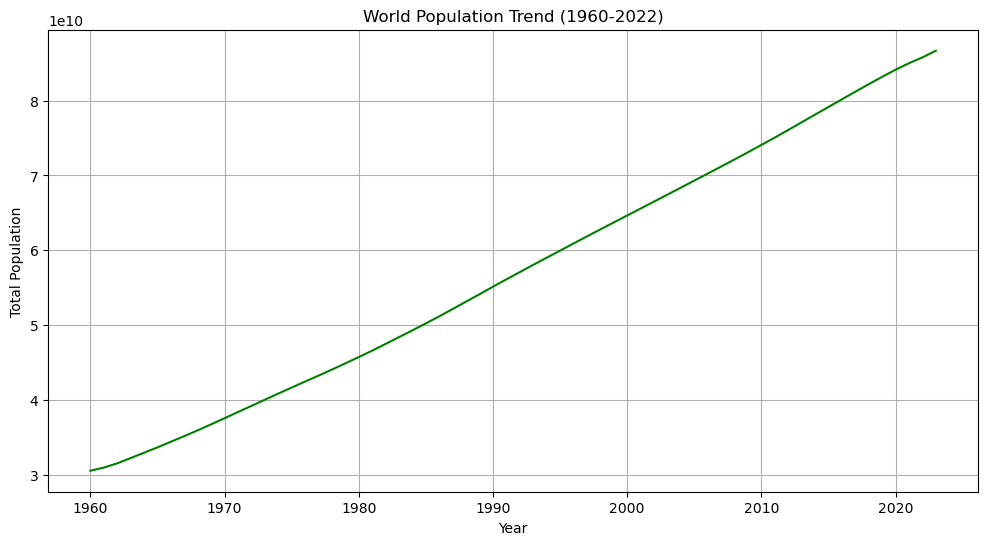

In [36]:
years = list(map(str, range(1960, 2024))) 
world_population = dataset[years].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(world_population.index.astype(int), world_population.values, color='green')
plt.title("World Population Trend (1960-2022)")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid(True)
plt.show()

Population density of Specific Countries

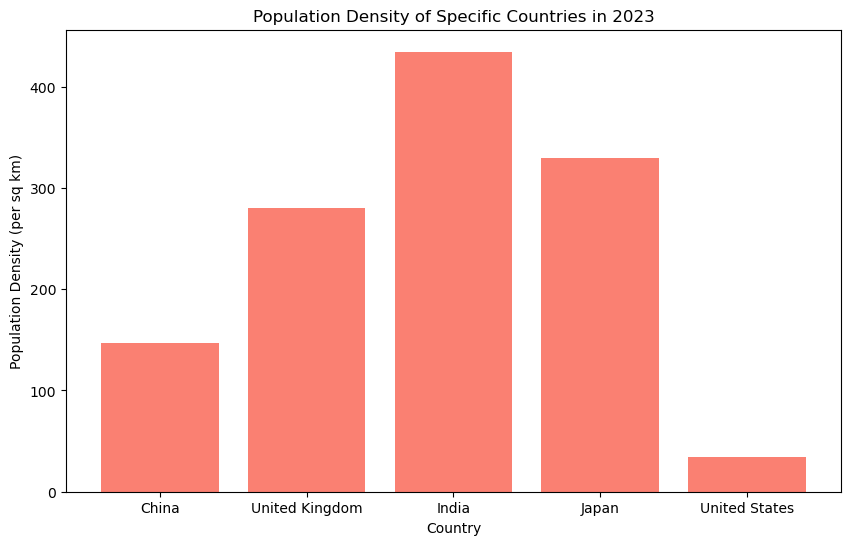

In [37]:
land_area_data = {
    'India': 3287263,
    'China': 9596961,
    'United States': 9833520,
    'Japan': 377975,       
    'United Kingdom': 243610
}

# Map land area to dataset and calculate population density for 2022
dataset['Land Area'] = dataset['Country Name'].map(land_area_data)
dataset['Population Density (per sq km)'] = dataset['2023'] / dataset['Land Area']

# Filter for selected countries
selected_countries_density = dataset[dataset['Country Name'].isin(countries)].set_index('Country Name')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(selected_countries_density.index, selected_countries_density['Population Density (per sq km)'], color='salmon')
plt.title("Population Density of Specific Countries in 2023")
plt.xlabel("Country")
plt.ylabel("Population Density (per sq km)")
plt.show()